(513, 799)


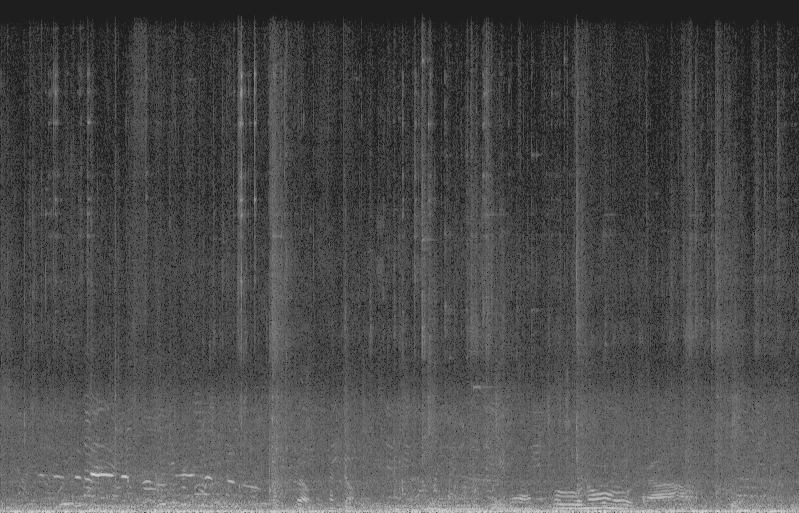

In [147]:
import PIL
from matplotlib import pyplot as plt
import numpy as np
import librosa
import scipy.signal

filepath = "../datasets/tau2019/TAU-urban-acoustic-scenes-2019-development/audio/airport-barcelona-0-0-a.wav"

def scale_to_range(x, min, max):
    x_std = (x - x.min()) / (x.max() - x.min())
    x_scaled = x_std * (max - min) + min
    return x_scaled

def generate_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=44100, mono=True)  # dataset está em 48kHz mono

    # S = librosa.feature.melspectrogram(
    #     y=y, sr=sr, n_fft=4096, hop_length=1024, n_mels=128, fmax=44100, fmin=0.0
    # )
    # S = librosa.power_to_db(S, ref=np.max)

    # S = librosa.feature.melspectrogram(
    #    y=y, sr=sr, n_fft=4096, hop_length=1024, n_mels=128
    # )
    # S = librosa.power_to_db(S, ref=np.max)

    # S = scipy.signal.spectrogram(
    #     y,
    #     fs=sr,
    #     window=scipy.signal.get_window("hann", 2048),
    # )

    S = librosa.stft(y,
                     n_fft=1024,
                     hop_length=552,
                     center=True)
    print(S.shape)
    S = librosa.power_to_db(np.abs(S)**2, ref=np.max)

    #dft size = (y_size (1025) - 1) * 2 = 2048

    return S

S = generate_spectrogram(filepath)

img = scale_to_range(S, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0)

im = PIL.Image.fromarray(img)

# map using plt colormap
im.putpalette((plt.get_cmap("viridis")(np.arange(256)) * 256).astype(np.uint8), rawmode="RGBA")

# convert im to BGR2GRAY
im = im.convert("L")

im

In [144]:
a = (plt.get_cmap("viridis")(np.arange(256)) * 256).astype(np.uint8)
a, a.shape

(array([[ 68,   1,  84,   0],
        [ 68,   2,  85,   0],
        [ 69,   3,  87,   0],
        ...,
        [249, 231,  33,   0],
        [251, 231,  35,   0],
        [254, 231,  36,   0]], dtype=uint8),
 (256, 4))

In [6]:
from pathlib import Path
import codigo.features.feature_vector as feature_vector
import librosa
import numpy as np

DEV_DS = Path.home() / "pic/datasets/tau2019/TAU-urban-acoustic-scenes-2019-development"

def feature_vector_5(audio_path: Path, spectrogram_path: Path):
    glcm = feature_vector.fv_glcm_ex(audio_path, spectrogram_path)
    y, fs = librosa.load(audio_path, sr=44100, mono=True)
    mfccs = librosa.feature.mfcc(y=y, sr=fs, n_mfcc=20)

    # compute mean, median, max, min and stddev of mfccs
    mfccs = np.vstack((
        np.mean(mfccs, axis=1),
        np.median(mfccs, axis=1),
        np.max(mfccs, axis=1),
        np.min(mfccs, axis=1),
        np.std(mfccs, axis=1)
    ))

    return np.hstack((glcm, mfccs.flatten(),))

extrator = feature_vector_5

def process_file(filename):
    audio_path = DEV_DS / filename
    img_path = DEV_DS / "spectrograms" / (Path(filename).stem + ".png")
    feature_vector = extrator(audio_path, img_path)
    return feature_vector

process_file("audio/airport-barcelona-0-0-a.wav")

array([284.88872065, 293.5605199 , 175.74179239, 294.28278733, 323.47329345, 293.5605199 , 260.04186742, 294.28278733,  12.72119597,  12.94679813, ...,  11.56762218,   9.68520832,   9.11570358,
         7.59720659,   6.68525887,   7.39842224,   6.03252459,   5.85343361,   5.86883688,   6.52017403])